In [37]:
import numpy as np
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import torchvision

batch_size = 128
log_interval = 100 #how many batches to wait before showing training status
epochs = 5


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)


class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.fc1 = nn.Linear(784, 400)
        self.fc11 = nn.Linear(400,400)
        self.fc21 = nn.Linear(400, latent_dim)
        self.fc22 = nn.Linear(400, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc31 = nn.Linear(400,400)
        self.fc4 = nn.Linear(400, 784)
        self.fc41 = nn.Linear(400, 784)


    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        h1 = F.relu(self.fc11(h1))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        h3 = F.relu(self.fc31(h3))
        return torch.sigmoid(self.fc4(h3)), (torch.sigmoid(self.fc41(h3))+1e-4) 

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    def sample(self, epoch):
        with torch.no_grad():
            sample = torch.randn(64, self.latent_dim).to(device)
            sample, _ = self.decode(sample)
            sample = sample.cpu()
            print('Sample of epoch {}'.format(epoch))
            imshow(sample.view(64, 1, 28, 28))



# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_mu, recon_sigma, x, mu, logvar):
    #BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    add_Term = 1/2*(784*np.log(2*np.pi)+recon_sigma.log().sum())
    sigma_inv = 1/recon_sigma
    weightedMSE = (1/2*sigma_inv*(x.view(-1, 784)-recon_mu)**2).sum()
    logP_X = weightedMSE+add_Term

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)

    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return logP_X + KLD

def imshow(img):
    img = torchvision.utils.make_grid(img)
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

    
            


tensor(0.6942, device='cuda:0', grad_fn=<MaxBackward1>) tensor(0.3273, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 1 [0/60000 (0%)]	Loss: -83.861069
tensor(0.9793, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 1 [12800/60000 (21%)]	Loss: -1819.608276
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 1 [25600/60000 (43%)]	Loss: -1813.167236
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 1 [38400/60000 (64%)]	Loss: -1949.833984
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 1 [51200/60000 (85%)]	Loss: -1998.363037
====> Epoch: 1 Average loss: -1836.0635
Comparison: MNIST image above / generated image below


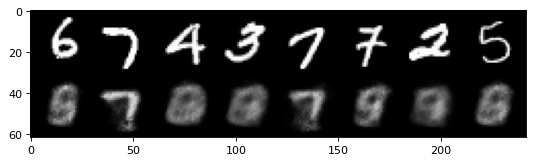

====> Test set loss: -2068.7600
Sample of epoch 1


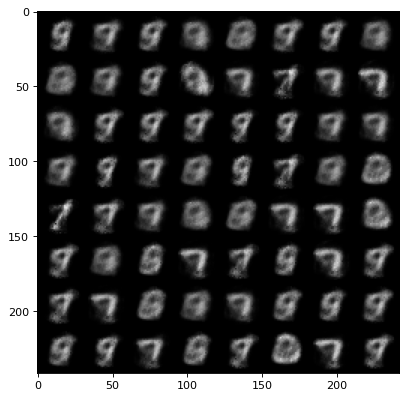

tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 2 [0/60000 (0%)]	Loss: -2038.341675
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 2 [12800/60000 (21%)]	Loss: -2035.826782
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 2 [25600/60000 (43%)]	Loss: -2148.297852
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 2 [38400/60000 (64%)]	Loss: -2177.155518
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 2 [51200/60000 (85%)]	Loss: -2146.414795
====> Epoch: 2 Average loss: -2120.9387
Comparison: MNIST image above / generated image below


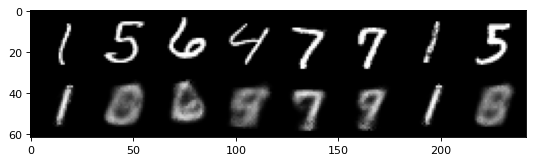

====> Test set loss: -2179.9327
Sample of epoch 2


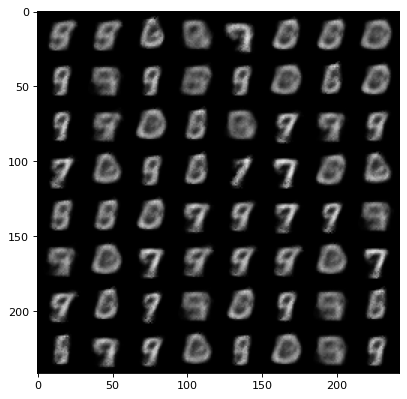

tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 3 [0/60000 (0%)]	Loss: -2205.606934
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 3 [12800/60000 (21%)]	Loss: -2169.806152
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 3 [25600/60000 (43%)]	Loss: -2209.458008
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 3 [38400/60000 (64%)]	Loss: -2215.149902
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 3 [51200/60000 (85%)]	Loss: -2274.665527
====> Epoch: 3 Average loss: -2204.6339
Comparison: MNIST image above / generated image below


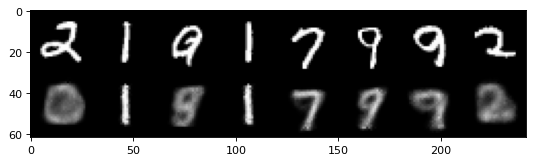

====> Test set loss: -2221.9112
Sample of epoch 3


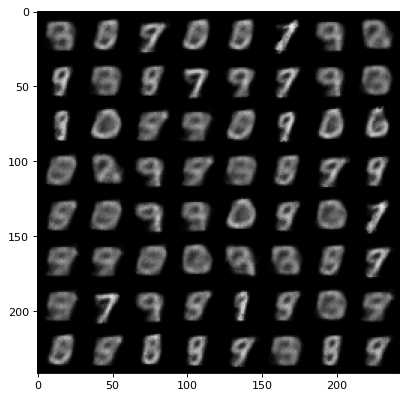

tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 4 [0/60000 (0%)]	Loss: -2282.236084
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 4 [12800/60000 (21%)]	Loss: -2191.106201
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 4 [25600/60000 (43%)]	Loss: -2250.054443
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 4 [38400/60000 (64%)]	Loss: -2328.419922
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 4 [51200/60000 (85%)]	Loss: -2249.584717
====> Epoch: 4 Average loss: -2249.9539
Comparison: MNIST image above / generated image below


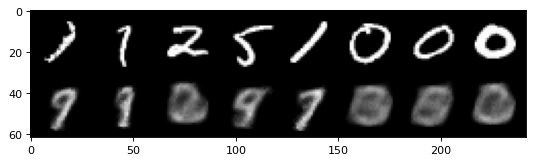

====> Test set loss: -2256.0142
Sample of epoch 4


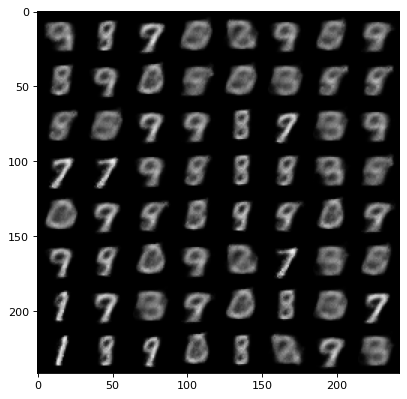

tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 5 [0/60000 (0%)]	Loss: -2251.588379
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 5 [12800/60000 (21%)]	Loss: -2298.947266
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 5 [25600/60000 (43%)]	Loss: -2312.421631
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 5 [38400/60000 (64%)]	Loss: -2248.985352
tensor(1.0001, device='cuda:0', grad_fn=<MaxBackward1>) tensor(1.0000e-04, device='cuda:0', grad_fn=<MinBackward1>)
Train Epoch: 5 [51200/60000 (85%)]	Loss: -2283.106934
====> Epoch: 5 Average loss: -2271.2680
Comparison: MNIST image above / generated image below


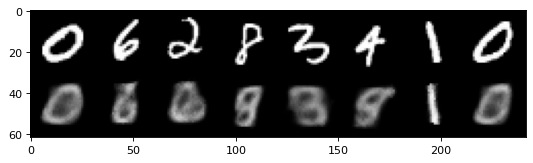

====> Test set loss: -2282.8329
Sample of epoch 5


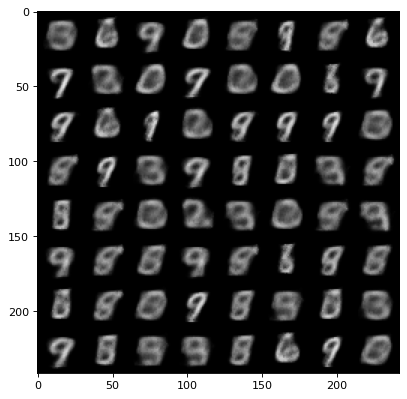

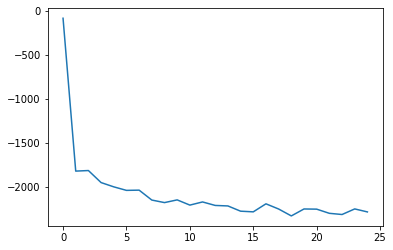

In [38]:
model = VAE(2).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

losses = []
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        (recon_batch, recon_sigma), mu, logvar = model(data)
        loss = loss_function(recon_batch, recon_sigma, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(recon_sigma.max(), recon_sigma.min())
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))
            losses.append(loss / len(data))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            (recon_batch, recon_sigma), mu, logvar = model(data)
            test_loss += loss_function(recon_batch, recon_sigma, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(batch_size, 1, 28, 28)[:n]])
                print('Comparison: MNIST image above / generated image below')
                imshow(comparison)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    

            
def latent_space_rep():
  with torch.no_grad():
    latent_rep = []
    for i in range(8):
      for j in range(8):
        latent_rep.append([i-4,j-4])
    latent_tensor = torch.tensor(latent_rep)
    return latent_tensor
            
if __name__ == "__main__":
    for epoch in range(1, epochs + 1):
        train(epoch)
        test(epoch)
        model.sample(epoch)
    plt.plot(losses)

            

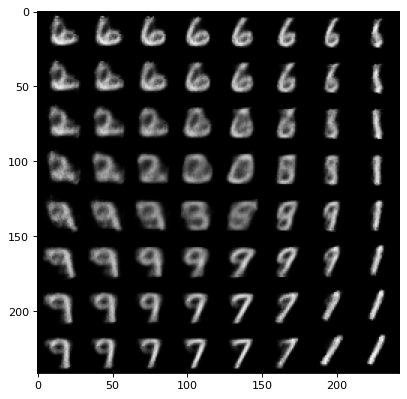

In [40]:
def latent_space_rep():
  with torch.no_grad():
    latent_rep = []
    for i in range(8):
      for j in range(8):
        latent_rep.append([i-4,j-4])
    latent_tensor = torch.tensor(latent_rep).float().to(device)
    latent_tensor, _ = model.decode(latent_tensor)
    latent_tensor = latent_tensor.cpu()
    imshow(latent_tensor.view(64, 1, 28, 28))

latent_space_rep()
#print(latent_space_rep().shape)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


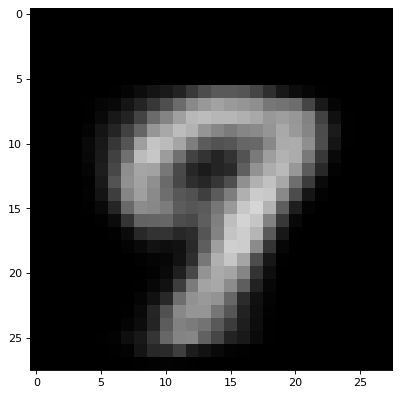

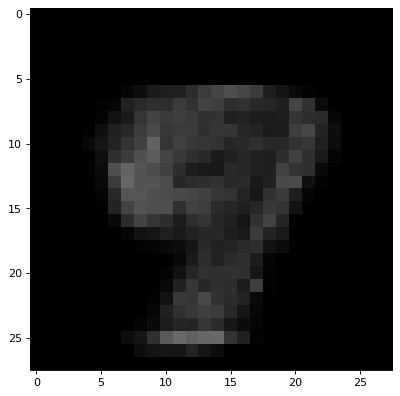

tensor(0.4134, device='cuda:0') tensor(1.0000e-04, device='cuda:0')
tensor(0.8355, device='cuda:0') tensor(6.7502e-11, device='cuda:0')


In [39]:
latent_tensor = torch.tensor(torch.randn(2)).float().to(device)
mu, sigma = model.decode(latent_tensor)
mu = mu.detach()
sigma = sigma.detach()
imshow(mu.view(1, 1, 28, 28))

imshow(sigma.view(1, 1, 28, 28))
print(sigma.max(), sigma.min())
print(mu.max(),mu.min())

More training would show an even better sigma here were it is only unsure about the edges anymore. Optimal training would send the sigma to zero. (Note in the code I did a sigmoid activation and added 1e-04 such that it's not that instable)